# **Dominant Color Extraction Using K-Means**

In [2]:
# Import impotant libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from scipy.cluster.vq import kmeans,vq
from scipy.cluster.vq import whiten
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2

import warnings
warnings.filterwarnings('ignore')

shape (1001, 1500, 3)
pixels shape : (374500, 3)
New shape : (500, 749, 3)


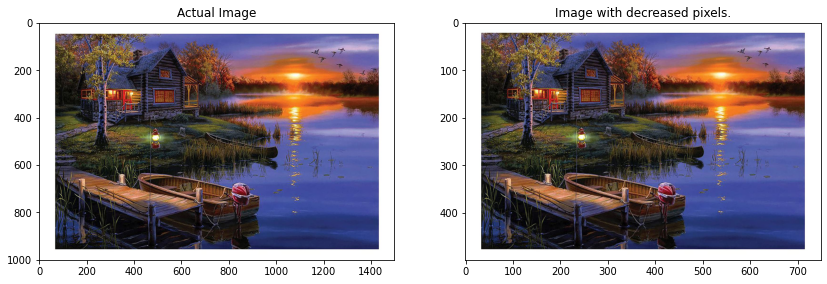

In [3]:
# Read image and print dimensions
image = img.imread("Scene.jpg")

print('shape', image.shape)
r, c = image.shape[:2]
out_r = 500
new_image = cv2.resize(image, (int(out_r*float(c)/r), out_r))

pixels = new_image.reshape((-1, 3))

print('pixels shape :', pixels.shape)
print('New shape :', new_image.shape)

plt.figure(figsize=(14,10))
plt.axis("off")

plt.subplot(121)
plt.title('Actual Image')
plt.imshow(image)

plt.subplot(122)
plt.title('Image with decreased pixels.')
plt.imshow(new_image)

In [4]:
# Let us store RGB values of all pixels in lists r, g and b.
r,g,b=[],[],[]
for row in new_image:
    for r_val, g_val, b_val in row:
        r.append(r_val)
        g.append(g_val)
        b.append(b_val)


In [5]:
# using scipy's inbuilt scaler whiten to scale.
scaled_red = whiten(r)
scaled_blue = whiten(b)
scaled_green = whiten(g)

In [6]:
df = pd.DataFrame({'red':r,'blue':b,'green':g,'scaled_red':scaled_red,'scaled_blue':scaled_blue,
                   'scaled_green':scaled_green})
df.head()

,red,blue,green,scaled_red,scaled_blue,scaled_green
0,255,255,255,3.067592,2.993194,3.223169
1,255,255,255,3.067592,2.993194,3.223169
2,255,255,255,3.067592,2.993194,3.223169
3,255,255,255,3.067592,2.993194,3.223169
4,255,255,255,3.067592,2.993194,3.223169


### **Optimizing K(number of clusters)**
Elbow Method

In [9]:
distortions = []
num_clusters = range(1, 10)

for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_red','scaled_blue','scaled_green']],i)
    distortions.append(distortion)

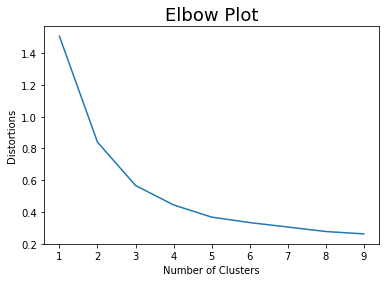

In [10]:
# Create a line plot of num_clusters and distortions
plt.plot(num_clusters, distortions)
plt.xticks(num_clusters)
plt.title('Elbow Plot', size=18)
plt.xlabel('Number of Clusters')
plt.ylabel("Distortions")
plt.show()

We can see from Elbow Plot that optimal value of k is 5.

### **K-Means Clustering**

In [11]:
# using sklearn's inbuilt kmean for clustering data and finding cluster centers i.e. means for clusters.
k_means= KMeans(n_clusters=5)
k_means.fit(pixels)
print(k_means.cluster_centers_)

[[184.43077215 113.06202304  68.48442907]
 [ 95.35636534  96.73211084 163.03019509]
 [252.84873676 252.16274185 251.76140465]
 [ 71.06222548  61.98806513  70.1343671 ]
 [ 28.97653614  23.06061591  20.6253181 ]]


In [12]:
colors = np.asarray(k_means.cluster_centers_, dtype='uint8')
print(colors)

[[184 113  68]
 [ 95  96 163]
 [252 252 251]
 [ 71  61  70]
 [ 28  23  20]]


Original Image --->


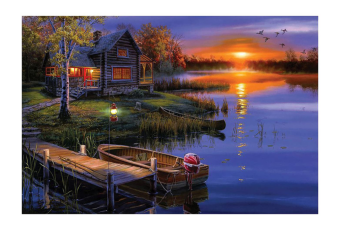

Dominant 5 Colours of Image --->


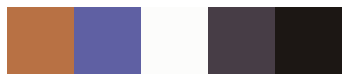

In [13]:
# Displaying Dominant Colours
print("Original Image --->")
plt.axis('off')
plt.imshow(image)
plt.show()

print("Dominant",5,"Colours of Image --->")
plt.axis('off')
plt.imshow([colors])
plt.show()

In [14]:
# percentage of each extracted colour in the image
pixels_colourwise = np.unique(k_means.labels_, return_counts=True)[1]
percentage = pixels_colourwise/pixels.shape[0]
percentage

array([0.11260347, 0.22776235, 0.18051001, 0.24059012, 0.23853405])

In [15]:
colors

array([[184, 113,  68],
       [ 95,  96, 163],
       [252, 252, 251],
       [ 71,  61,  70],
       [ 28,  23,  20]], dtype=uint8)

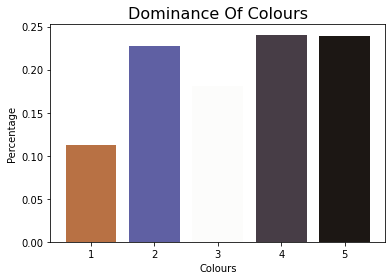

In [16]:
plt.title('Dominance Of Colours', size=16)
plt.bar(range(1,6), percentage, color=np.array(colors)/255)
plt.ylabel('Percentage')
plt.xlabel('Colours')
plt.show()